# ============================================================
# SCRIPT PROJET ANALYSE DE LA CRIMINALITE DE LOS ANGELES
# ============================================================

# ============================================================
# DIAGNOSTIQUE
# ============================================================

In [1]:
#IMPORTATION DES DONNEES
import pandas as pd
import numpy as np
file = "Crime_Data_from_2020_to_Present.csv"
df = pd.read_csv(file)
df
print("Shape:", df.shape)
df.info()


Shape: (982638, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  flo

In [2]:
#INFORMATION SUR LE DATASET

df.info()  #On remarque 13 variables categorielles et 15 numeriques
#les types dates, heures, latitudes et longitudes de notre dataset ne sont pas coherents et doivent etre uniformiser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

In [3]:
#DESCRIPTION DES VARIABLES NUMERIQUES DU JEU DE DONNEE

df.describe() #On remarque la variable age avec un minimum negatif ce qui n'es pas logique, et doit par consequent etre transformer sur la bonne echelle

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


array([[<Axes: title={'center': 'DR_NO'}>,
        <Axes: title={'center': 'TIME OCC'}>,
        <Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'Rpt Dist No'}>],
       [<Axes: title={'center': 'Part 1-2'}>,
        <Axes: title={'center': 'Crm Cd'}>,
        <Axes: title={'center': 'Vict Age'}>,
        <Axes: title={'center': 'Premis Cd'}>],
       [<Axes: title={'center': 'Weapon Used Cd'}>,
        <Axes: title={'center': 'Crm Cd 1'}>,
        <Axes: title={'center': 'Crm Cd 2'}>,
        <Axes: title={'center': 'Crm Cd 3'}>],
       [<Axes: title={'center': 'Crm Cd 4'}>,
        <Axes: title={'center': 'LAT'}>, <Axes: title={'center': 'LON'}>,
        <Axes: >]], dtype=object)

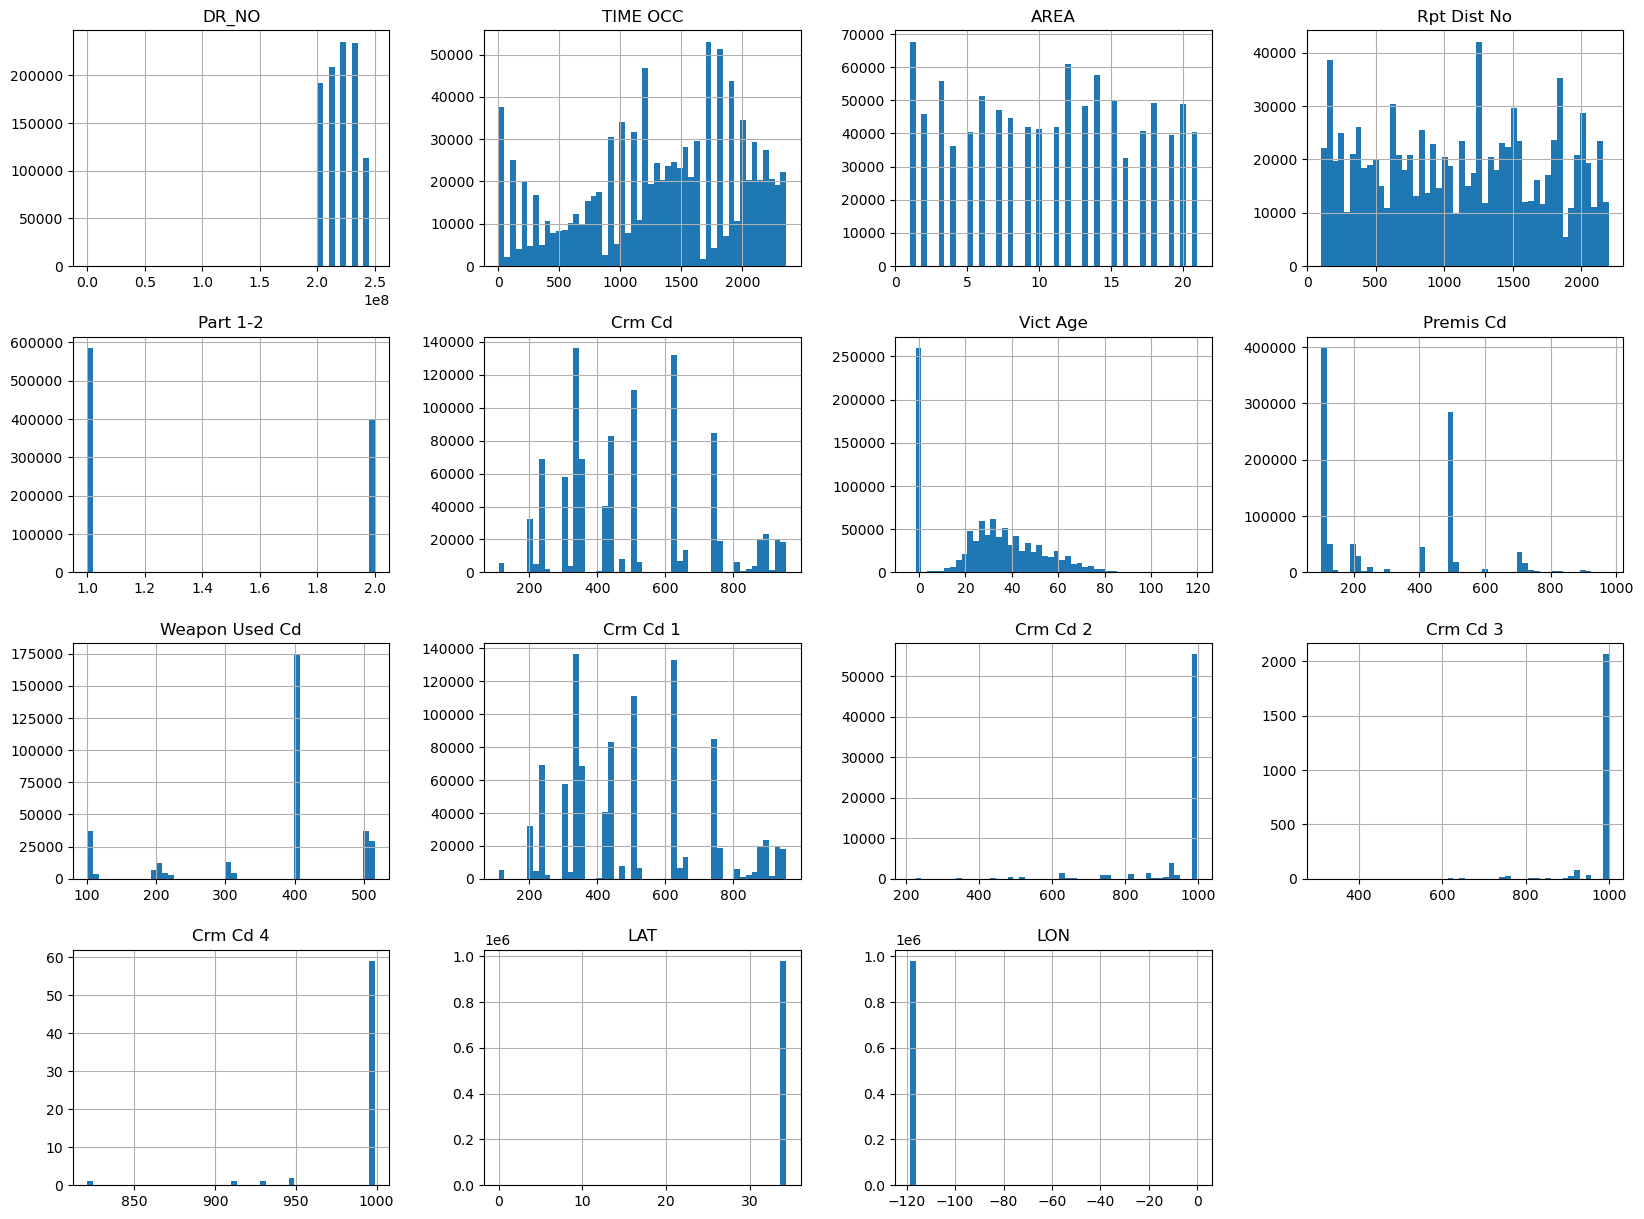

In [4]:
#Realisation des histogrammes des variables pour évaluer leurs distributions

df.hist(bins=50, figsize=(20,15))

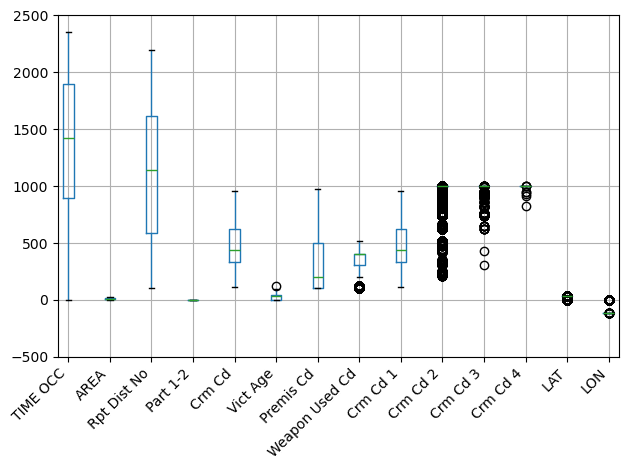

In [5]:
#Realisation d'un boxplot des variables pour evaluer leur dispersions

import matplotlib.pyplot as plt

colonnes = ["TIME OCC", "AREA", "Rpt Dist No", "Part 1-2", "Crm Cd", "Vict Age",
            "Premis Cd", "Weapon Used Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3",
            "Crm Cd 4", "LAT", "LON"]

# Espacement personnalisé sur l'axe X
positions = [i * 2 for i in range(len(colonnes))]  # espace de 2 unités entre chaque boîte

df[colonnes].boxplot(positions=positions)
plt.xticks(positions, colonnes, rotation=45, ha='right')  # pour lisibilité
plt.ylim(-500, 2500)
plt.tight_layout()
plt.show()

In [6]:
df_numeric = df.select_dtypes(include='number')

# Calculer la kurtosis
kurtosis_vals = df_numeric.kurt()

print(kurtosis_vals)
#Les variables entre -0.7 a -1.85 (part 1-2, AREA, Rpt Dist No, Premis Cd, TIME OCC, Vict Age, Crm Cd, Crm Cd 1) nous explique un aplatissement et peu de variation entre les differentes classes. ainsi les donnees ne sont pas concentrer a un seul endroit ou une seule classe
#la variable avec le kurtosis de environ -0.04 est plus proche de 0 pour demontrer une distribution proche de la normale
#ensuite, les kurtosis tres elever nous montre une presene des valeurs extremes tres marquees

DR_NO              -0.628217
TIME OCC           -0.783716
AREA               -1.190074
Rpt Dist No        -1.192893
Part 1-2           -1.847739
Crm Cd             -0.706505
Vict Age           -0.786088
Premis Cd          -0.917407
Weapon Used Cd     -0.046001
Crm Cd 1           -0.701716
Crm Cd 2           15.211275
Crm Cd 3           35.627479
Crm Cd 4           26.296475
LAT               425.442371
LON               429.123166
dtype: float64


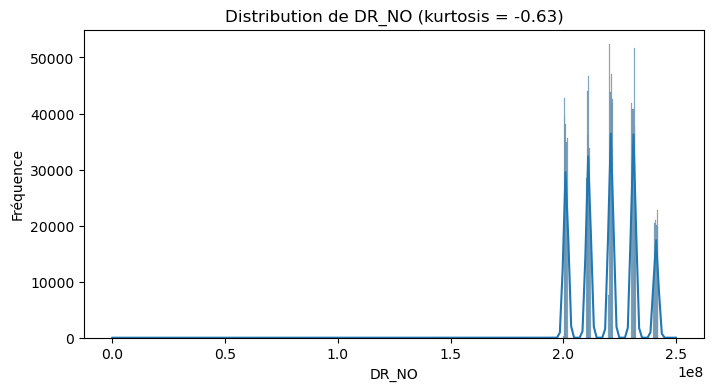

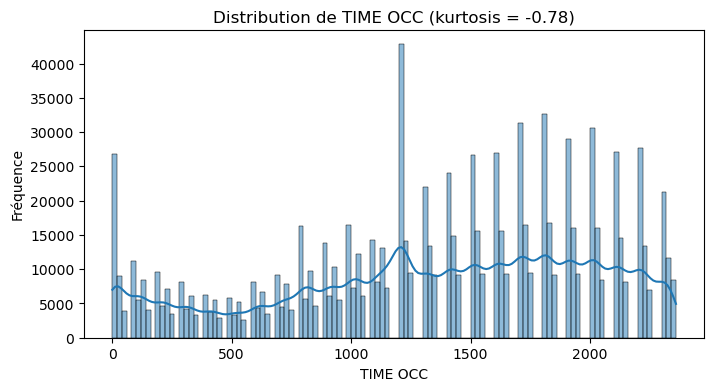

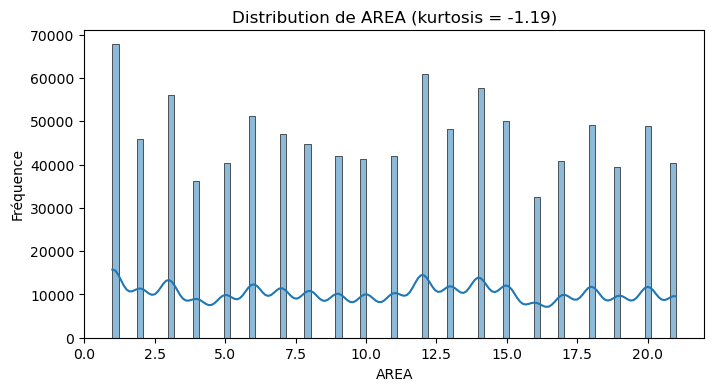

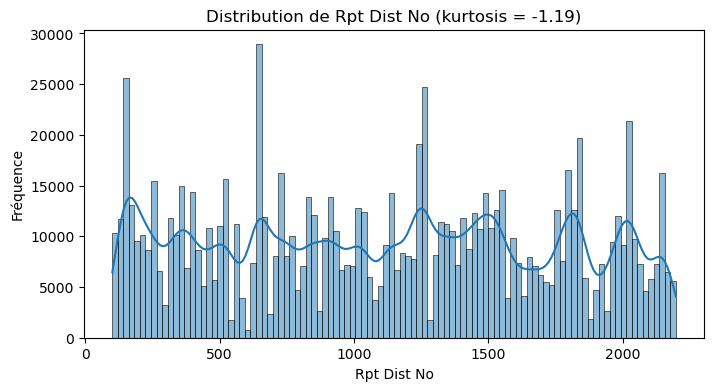

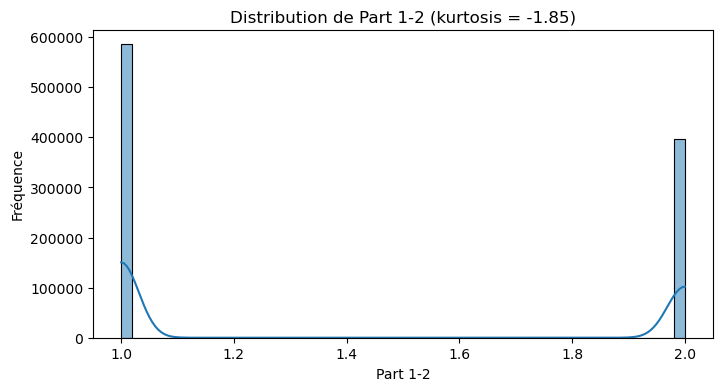

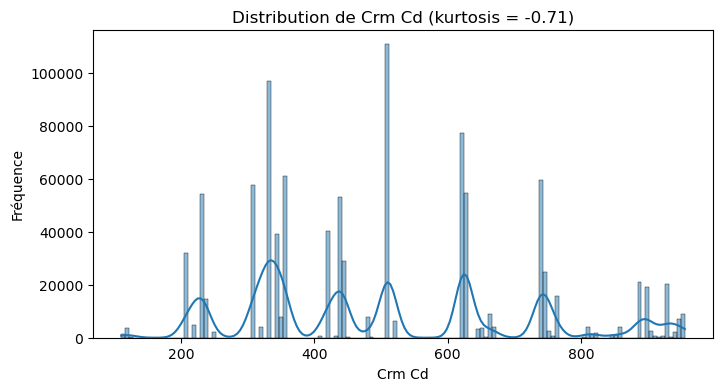

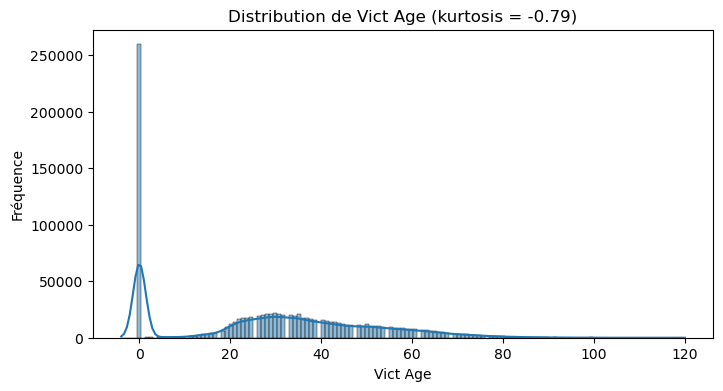

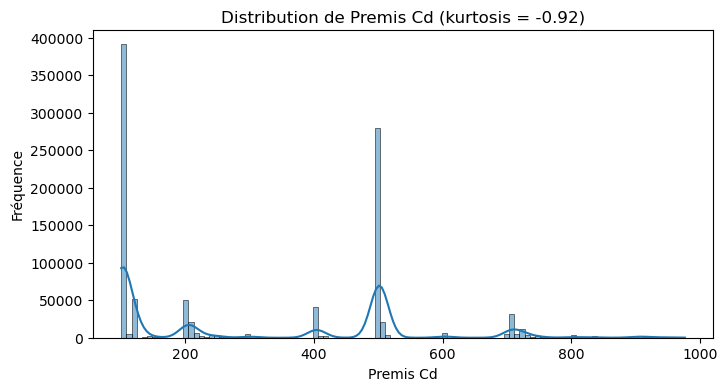

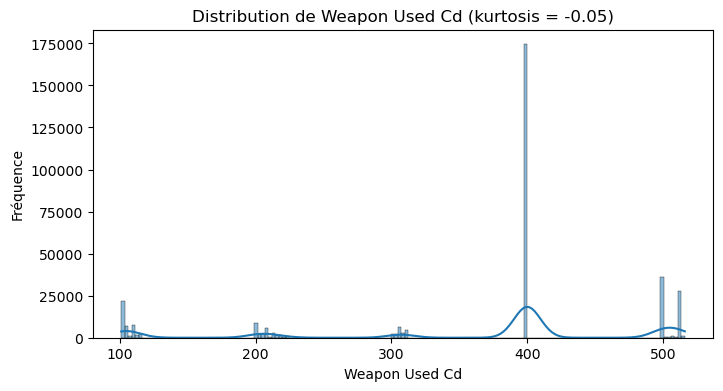

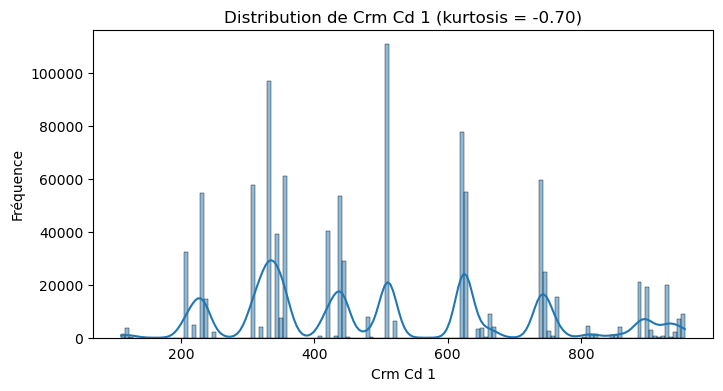

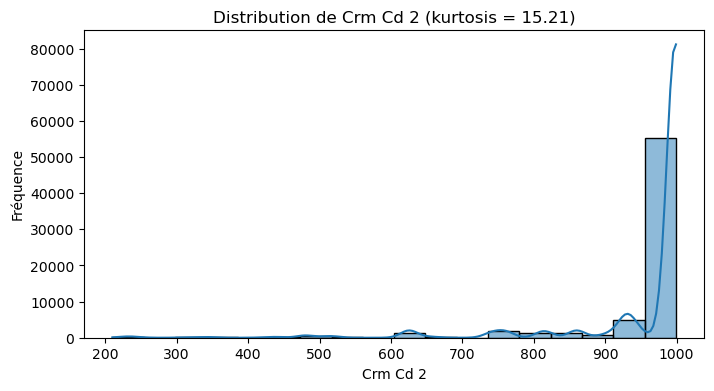

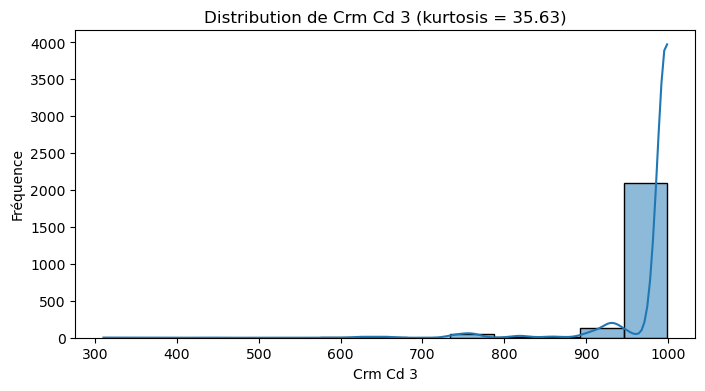

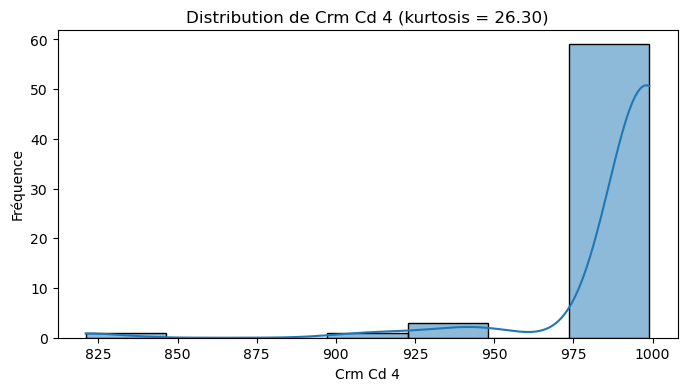

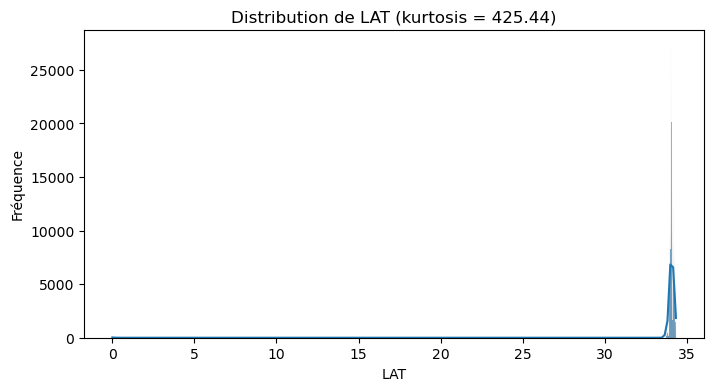

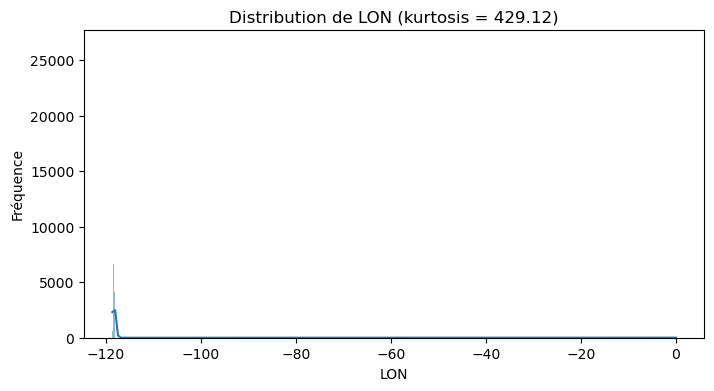

In [7]:
import seaborn as sns

for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col} (kurtosis = {df[col].kurt():.2f})')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

In [8]:
#DETECTION DU NOMBRE DE CHAMPS UNIQUES PAR VARIABLE
unique_counts = df.nunique().sort_values(ascending=False)
unique_counts

DR_NO             982638
Mocodes           309364
LOCATION           66265
Cross Street       10326
LAT                 5424
LON                 4980
DATE OCC            1735
Date Rptd           1735
TIME OCC            1439
Rpt Dist No         1209
Premis Cd            314
Premis Desc          306
Crm Cd 1             142
Crm Cd               140
Crm Cd Desc          140
Crm Cd 2             126
Vict Age             104
Weapon Used Cd        79
Weapon Desc           79
Crm Cd 3              37
AREA                  21
AREA NAME             21
Vict Descent          20
Status                 6
Crm Cd 4               6
Status Desc            6
Vict Sex               5
Part 1-2               2
dtype: int64

In [9]:
#VERIFICATION DE L'UNICITE DES CHAMPS ET LA PRESENCE DES DOUBLONS
df[df.duplicated(subset=["DR_NO"])]
#en verifiant la presence des doublons dans la cle primaire, on remarque une absence de doublons. ainsi, chaque enregistrement correspond a une valeur unique

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [10]:
#DETECTION DES VALEURS MANQUANTES
missing = df.isna().sum().sort_values(ascending=False)
missing
#On remarque que 13 variables contiennent des valeurs manquantes qu'ils est indispensable de gerer pour eviter les biais dans l'analyse

Crm Cd 4          982574
Crm Cd 3          980327
Crm Cd 2          913763
Cross Street      830789
Weapon Used Cd    656471
Weapon Desc       656471
Mocodes           145262
Vict Descent      138456
Vict Sex          138445
Premis Desc          585
Premis Cd             14
Crm Cd 1              11
Status                 1
Vict Age               0
Crm Cd                 0
Crm Cd Desc            0
AREA NAME              0
Rpt Dist No            0
AREA                   0
TIME OCC               0
Date Rptd              0
DATE OCC               0
DR_NO                  0
Part 1-2               0
Status Desc            0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

TESTER MCAR/MAR/MNAR

<Axes: >

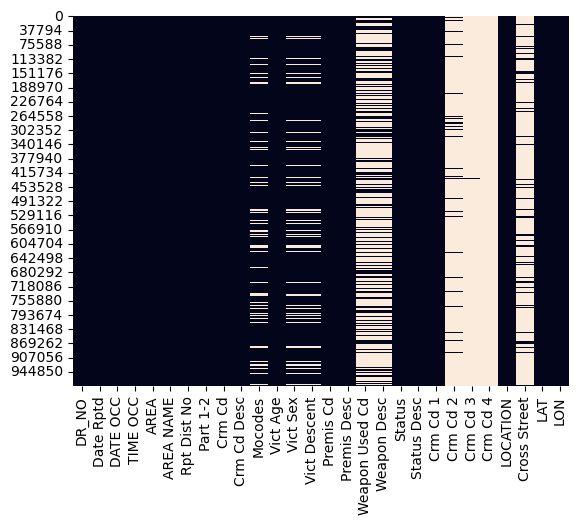

In [11]:
#Visualisation des valeurs manquantes
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap des manquants
sns.heatmap(df.isna(), cbar=False)

In [12]:
#Calcul des pourcentages des valeurs manquantes
df.isna().mean().sort_values(ascending=False) * 100

Crm Cd 4          99.993487
Crm Cd 3          99.764817
Crm Cd 2          92.990806
Cross Street      84.546802
Weapon Used Cd    66.807003
Weapon Desc       66.807003
Mocodes           14.782860
Vict Descent      14.090235
Vict Sex          14.089115
Premis Desc        0.059534
Premis Cd          0.001425
Crm Cd 1           0.001119
Status             0.000102
Vict Age           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
AREA               0.000000
TIME OCC           0.000000
Date Rptd          0.000000
DATE OCC           0.000000
DR_NO              0.000000
Part 1-2           0.000000
Status Desc        0.000000
LOCATION           0.000000
LAT                0.000000
LON                0.000000
dtype: float64

a l issue de l etape diagnostique, nous avons remarquer des problemes de
- erreurs de format ou de types
- valeurs aberantes
- valeurs manquantes
- non unicite de cellule
- contradictions logiques
- Categorie incoherente et mal orthographier
- Problemes d'incoherences semantiques

# ============================================================
# NETTOYAGE ET TRANSFORMATION DES DONNEES
# ============================================================

# ============================================================
# TRAITEMENT DES COLONNES STRUCTURELLES (Crm Cd 2 - 4)
# Manquants representant des absences logiques
# ============================================================

In [13]:
#TRAITEMENT DES COLONNES STRUCTURELLES Crm Cd 2-4 
#Ces colonnes existent uniquement si un incident comporte plusieurs infractions. La grande majorité des crimes n’ont qu’un seul code (Crm Cd 1).
#Ainsi, Leur absence n’est pas une erreur, mais une absence logique. c'est pourquoi nous avons choisie : Remplacer par 0 (ou None) + créer un flag multi_crime.
#Car ainsi on encode l’info : « ce crime est simple vs multiple ».

# Remplacer NA par 0 (aucune infraction secondaire)
for col in ["Crm Cd 2", "Crm Cd 3", "Crm Cd 4"]:
    if col in df.columns:
        df[col] = df[col].fillna(000).astype(int)

# Créer un flag multi-crime (nouvelle colonne pour representer la variable crime multiple avec  1 si l’incident comporte plusieurs infractions et 0 s’il n’y a qu’une seule infraction (ou aucune secondaire)
df["multi_crime_flag"] = ((df["Crm Cd 2"] > 0) | 
                          (df["Crm Cd 3"] > 0) | 
                          (df["Crm Cd 4"] > 0)).astype(int)

# Vérifier qu'il n'y a plus de valeurs manquantes dans les colonnes ciblées
for col in ["Crm Cd 2", "Crm Cd 3", "Crm Cd 4"]:
    if col in df.columns:
        missing_count = df[col].isna().sum()
        zero_count = (df[col] == 0).sum()
        print(f"{col} → NA restantes: {missing_count}, Zéros: {zero_count}")

Crm Cd 2 → NA restantes: 0, Zéros: 913763
Crm Cd 3 → NA restantes: 0, Zéros: 980327
Crm Cd 4 → NA restantes: 0, Zéros: 982574


# ============================================================
# TRAITEMENT DE LA VARIABLE Cross Street (MAR/MNAR)
# Absence non aléatoire, mais liée au type de localisation
# ============================================================

In [14]:
# TRAITEMENT DE LA VARIABLE Cross Street (MAR/MNAR)
#Disponible seulement si le lieu de l’incident est une intersection. Si le crime a eu lieu à une adresse classique (maison, commerce, etc.), cette donnée est absente.
# Ainsi, l'absence n'est pas aléatoire, mais liée au type de localisation. C'est pourquoi nous avons choisie de remplacer les valeurs manquantes par "Pas d'intersection" et de créer une variable binaire cross_missing.
#Cela permet de tester si les crimes aux intersections diffèrent des autres.
# Créer un flag qui indique si l'adresse est une intersection puis remplacer les valeurs manquantes par None
if "Cross Street" in df.columns:
    df["cross_missing_flag"] = df["Cross Street"].isna().astype(int)
    df["Cross Street"] = df["Cross Street"].fillna("No cross street")
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,multi_crime_flag,cross_missing_flag
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998,0,0,1900 S LONGWOOD AV,No cross street,34.0375,-118.3506,1,1
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998,0,0,1000 S FLOWER ST,No cross street,34.0444,-118.2628,1,1
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,0,0,0,1400 W 37TH ST,No cross street,34.0210,-118.3002,0,1
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,0,0,0,14000 RIVERSIDE DR,No cross street,34.1576,-118.4387,0,1
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,0,0,0,1900 TRANSIENT,No cross street,34.0944,-118.3277,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,341.0,0,0,0,3700 WILSHIRE BL,No cross street,34.0617,-118.3066,0,1
982634,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,510.0,0,0,0,4000 W 23RD ST,No cross street,34.0362,-118.3284,0,1
982635,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,745.0,0,0,0,1300 W SUNSET BL,No cross street,34.0685,-118.2460,0,1
982636,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,230.0,0,0,0,FLOWER ST,JEFFERSON BL,34.0215,-118.2868,0,0


# ============================================================
# TRAITEMENT DE LA VARIABLE Weapon (MNAR)
# absence non aleatoire (directement liée au fait qu’aucune arme n’a été employée)
# ============================================================

In [15]:
#TRAITEMENT DE LAVARIABLE Weapon (MNAR)
#Si aucune arme n’est utilisée, la police ne renseigne pas le champ.
#Ainsi, L’absence est directement liée au fait qu’aucune arme n’a été employée. nous avons choisie de remplacer NA par No weapon (catégorie explicite).
#Cela évite d’interpréter l’absence comme une perte d’info aléatoire.
# nettoyer Weapon Used Cd : remplacer NA par 0 = No weapon
if "Weapon Used Cd" in df.columns:
    df["Weapon Used Cd"] = df["Weapon Used Cd"].fillna(0).astype(int)

#nettoyer Weapon Desc : remplacer NA par "No weapon"
if "Weapon Desc" in df.columns:
    df["Weapon Desc"] = df["Weapon Desc"].fillna("No weapon")

# Flag pour savoir si une arme a été utilisée
df["weapon_missing_flag"] = (df["Weapon Used Cd"] == 0).astype(int)
df['Weapon Used Flag'] = (df['Weapon Desc'] != "No weapon").astype(int)

df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,multi_crime_flag,cross_missing_flag,weapon_missing_flag,Weapon Used Flag
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,0,0,1900 S LONGWOOD AV,No cross street,34.0375,-118.3506,1,1,1,0
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,0,0,1000 S FLOWER ST,No cross street,34.0444,-118.2628,1,1,1,0
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0,0,1400 W 37TH ST,No cross street,34.0210,-118.3002,0,1,1,0
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0,0,14000 RIVERSIDE DR,No cross street,34.1576,-118.4387,0,1,1,0
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0,0,1900 TRANSIENT,No cross street,34.0944,-118.3277,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,0,0,3700 WILSHIRE BL,No cross street,34.0617,-118.3066,0,1,1,0
982634,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,0,0,4000 W 23RD ST,No cross street,34.0362,-118.3284,0,1,1,0
982635,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,0,0,1300 W SUNSET BL,No cross street,34.0685,-118.2460,0,1,0,1
982636,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,0,0,FLOWER ST,JEFFERSON BL,34.0215,-118.2868,0,0,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DR_NO                982638 non-null  int64  
 1   Date Rptd            982638 non-null  object 
 2   DATE OCC             982638 non-null  object 
 3   TIME OCC             982638 non-null  int64  
 4   AREA                 982638 non-null  int64  
 5   AREA NAME            982638 non-null  object 
 6   Rpt Dist No          982638 non-null  int64  
 7   Part 1-2             982638 non-null  int64  
 8   Crm Cd               982638 non-null  int64  
 9   Crm Cd Desc          982638 non-null  object 
 10  Mocodes              837376 non-null  object 
 11  Vict Age             982638 non-null  int64  
 12  Vict Sex             844193 non-null  object 
 13  Vict Descent         844182 non-null  object 
 14  Premis Cd            982624 non-null  float64
 15  Premis Desc      

# ========================================================================================================
# TRAITEMENT DE LA COLONNE "MOCODES" (MAR -> pas de monocodes dans certains types de crimes)
#  Non respect des principes du Tidy Data
# Objectif : double traitement pour l'analyse exploratoire et préparation pour modèle(analyse predictive)
# ========================================================================================================

In [17]:
#Les « Modus operandi » ne sont pas toujours enregistrés (ex : pickpocketage simple peut ne pas avoir de code, mais un cambriolage en série oui).
#Ainsi, tout Dépend du type de crime, donc pas aléatoire mais lié à une variable externe (Crm Cd). 
#Or, une cellule contient aucun, un ou plusieurs codes, ce qui entrave a la regle du Tidy data selon lequel une cellule doit contenir une et une seule valeur.
#Aussi, le but de notre analyse etant une analyse exploratoire et predictive, nous allons effectuer un double traitement pour cette colonne enfin de guarantir l'uniformite du datatset

# ------------------------------------------------------------
# Étape 1 — Nettoyage de la colonne Mocodes
# ------------------------------------------------------------
if "Mocodes" in df.columns:
    print("=== Nettoyage de Mocodes ===")

    # 1. Normaliser les espaces et supprimer les tabulations
    df["Mocodes"] = df["Mocodes"].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()

    # 2. Remplacer les valeurs vides ou incohérentes ("nan", "None") par NaN
    df.loc[df["Mocodes"].isin(["", "nan", "None"]), "Mocodes"] = np.nan    #car les manquants eux meme sont de l'information utile

    # 3. Créer une variable indiquant si Mocodes est manquant qui ajoute un flag NA pour mocodes
    df["mocode_missing_flag"] = df["Mocodes"].isna().astype(int)

    # 4. Transformer chaque cellule en liste de codes (ex: "0310 0345" → ['0310','0345'])
    df["Mocodes_list"] = df["Mocodes"].apply(lambda x: x.split(" ") if pd.notna(x) else [])

    print("Étape 1 terminée : Mocodes nettoyé et converti en liste.\n")
    print(df[["Mocodes", "Mocodes_list", "mocode_missing_flag"]].head())

if "Mocodes" in df.columns:
    df["Mocodes"] = df["Mocodes"].fillna("None")


=== Nettoyage de Mocodes ===
Étape 1 terminée : Mocodes nettoyé et converti en liste.

               Mocodes              Mocodes_list  mocode_missing_flag
0                  NaN                        []                    1
1       1822 1402 0344        [1822, 1402, 0344]                    0
2            0344 1251              [0344, 1251]                    0
3            0325 1501              [0325, 1501]                    0
4  1822 1501 0930 2004  [1822, 1501, 0930, 2004]                    0


# ============================================================
# TRAITEMENT DES VARIABLES Victimes sexe et descend (MNAR) -> Absence liee a la variables elle meme
# ============================================================

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DR_NO                982638 non-null  int64  
 1   Date Rptd            982638 non-null  object 
 2   DATE OCC             982638 non-null  object 
 3   TIME OCC             982638 non-null  int64  
 4   AREA                 982638 non-null  int64  
 5   AREA NAME            982638 non-null  object 
 6   Rpt Dist No          982638 non-null  int64  
 7   Part 1-2             982638 non-null  int64  
 8   Crm Cd               982638 non-null  int64  
 9   Crm Cd Desc          982638 non-null  object 
 10  Mocodes              982638 non-null  object 
 11  Vict Age             982638 non-null  int64  
 12  Vict Sex             844193 non-null  object 
 13  Vict Descent         844182 non-null  object 
 14  Premis Cd            982624 non-null  float64
 15  Premis Desc      

In [19]:
#TRAITEMENT DES VARIABLES Victime sexe et descend ,  (MNAR)
#Ces champs sont souvent manquants car la victime ne souhaite pas divulguer ou l’agent n’a pas pu obtenir l’info.
#Ainsi, l'Absence est liée à des facteurs sensibles, pas aléatoire.
#l'Action choisie est d'ajouter catégorie « Unknown ». Pour éviter de supprimer ces lignes et conserver l’info que « sexe/origine non déclaré ».

# nettoyage de Vict Sex : remplacer NA par Unknown
if "Vict Sex" in df.columns:
    # Étape 1 : Remplacer les valeurs incohérentes par NaN
    df["Vict Sex"] = df["Vict Sex"].replace(["X", "H","-", ""], np.nan)
    # Étape 2 : Remplacer les NaN par "Unknown"
    df["Vict Sex"] = df["Vict Sex"].fillna("Unknown")

# nettoyage de Vict Descent : remplacer NA par Unknown
if "Vict Descent" in df.columns:
    df["Vict Descent"] = df["Vict Descent"].fillna("Unknown")

df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LOCATION,Cross Street,LAT,LON,multi_crime_flag,cross_missing_flag,weapon_missing_flag,Weapon Used Flag,mocode_missing_flag,Mocodes_list
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,No cross street,34.0375,-118.3506,1,1,1,0,1,[]
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,No cross street,34.0444,-118.2628,1,1,1,0,0,"[1822, 1402, 0344]"
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,No cross street,34.0210,-118.3002,0,1,1,0,0,"[0344, 1251]"
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,No cross street,34.1576,-118.4387,0,1,1,0,0,"[0325, 1501]"
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,No cross street,34.0944,-118.3277,0,1,1,0,0,"[1822, 1501, 0930, 2004]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,3700 WILSHIRE BL,No cross street,34.0617,-118.3066,0,1,1,0,0,"[0344, 1822]"
982634,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,4000 W 23RD ST,No cross street,34.0362,-118.3284,0,1,1,0,1,[]
982635,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,1300 W SUNSET BL,No cross street,34.0685,-118.2460,0,1,0,1,0,"[0329, 0400, 0416]"
982636,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,FLOWER ST,JEFFERSON BL,34.0215,-118.2868,0,0,0,1,0,"[1822, 0334, 0416, 0445, 0449, 1202]"


# ============================================================
#  TRAITEMENT DE LA VARIABLE Victim age (MCAR)
# ============================================================

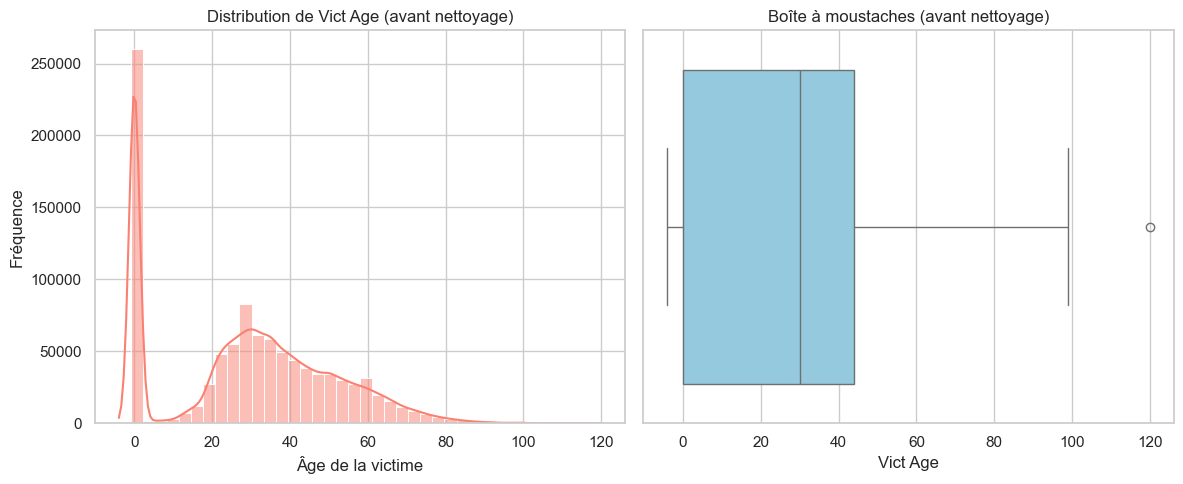

Statistiques avant nettoyage :
count    982638.000000
mean         29.079817
std          21.970094
min          -4.000000
25%           0.000000
50%          30.000000
75%          44.000000
max         120.000000
Name: Vict Age, dtype: float64


In [20]:
#TRAITEMENT DE LA VARIABLE Victim age 
#Nous allons dans un premier temps visualiser et exclure les valeurs aberrantes qui ont ete detecter a l'etape diagnotique
#Remplacer les valeurs invalides par NaN (valeur manquante logique) puis les imputer par la mediane des ages,
#Enfin, créer les tranches d’âge cohérentes. 

import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# ---Visualisation avant nettoyage ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df["Vict Age"], bins=40, kde=True, color="salmon")
plt.title("Distribution de Vict Age (avant nettoyage)")
plt.xlabel("Âge de la victime")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Vict Age"], color="skyblue")
plt.title("Boîte à moustaches (avant nettoyage)")

plt.tight_layout()
plt.show()

print("Statistiques avant nettoyage :")
print(df["Vict Age"].describe())


In [21]:
# --- Nettoyage des âges incohérents ---
import numpy as np

if "Vict Age" in df.columns:
    # 1️ Conversion en numérique et nettoyage des valeurs aberrantes - remplacer les valeurs aberantes (<0 ou >100) par NaN
    df["Vict Age"] = pd.to_numeric(df["Vict Age"], errors="coerce")
    df.loc[(df["Vict Age"] < 1) | (df["Vict Age"] > 100), "Vict Age"] = np.nan

    # 2️ Imputation par la médiane
    median_age = df["Vict Age"].median()
    df["Vict Age"] = df["Vict Age"].fillna(median_age)
    print(f"Age imputé : {median_age}")

    # 3️ Convertir en entier nullable (Int64)
    df["Vict Age"] = df["Vict Age"].astype("Int64")

    # 4️ Création des groupes d’âge à partir de Vict Age imputé
    df["Vict Age Group"] = pd.cut(
    df["Vict Age"],
    bins=[0, 12, 18, 30, 50, 70, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Middle Age", "Senior"],
    include_lowest=True
)

    # 5️ Vérification finale
     # 8️ Afficher un résumé final
    print("\nRésumé après nettoyage :")
    print(df["Vict Age"].describe())
    print("Valeurs manquantes après imputation Vict Age :", df["Vict Age"].isna().sum())
    print("Valeurs manquantes après création Vict Age Group :", df["Vict Age Group"].isna().sum())


Age imputé : 37.0

Résumé après nettoyage :
count     982638.0
mean     38.859795
std      13.419347
min            2.0
25%           31.0
50%           37.0
75%           44.0
max           99.0
Name: Vict Age, dtype: Float64
Valeurs manquantes après imputation Vict Age : 0
Valeurs manquantes après création Vict Age Group : 0


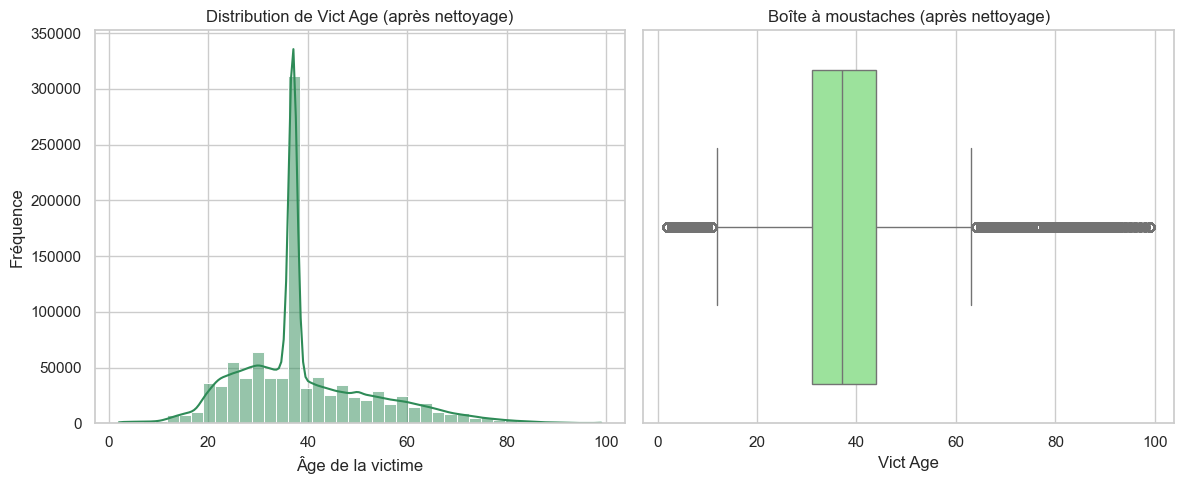


📈 Statistiques après nettoyage :
count     982638.0
mean     38.859795
std      13.419347
min            2.0
25%           31.0
50%           37.0
75%           44.0
max           99.0
Name: Vict Age, dtype: Float64


In [22]:
# --- Visualisation après nettoyage ---
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(df["Vict Age"], bins=40, kde=True, color="seagreen")
plt.title("Distribution de Vict Age (après nettoyage)")
plt.xlabel("Âge de la victime")
plt.ylabel("Fréquence")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Vict Age"], color="lightgreen")
plt.title("Boîte à moustaches (après nettoyage)")

plt.tight_layout()
plt.show()

print("\n📈 Statistiques après nettoyage :")
print(df["Vict Age"].dropna().describe())

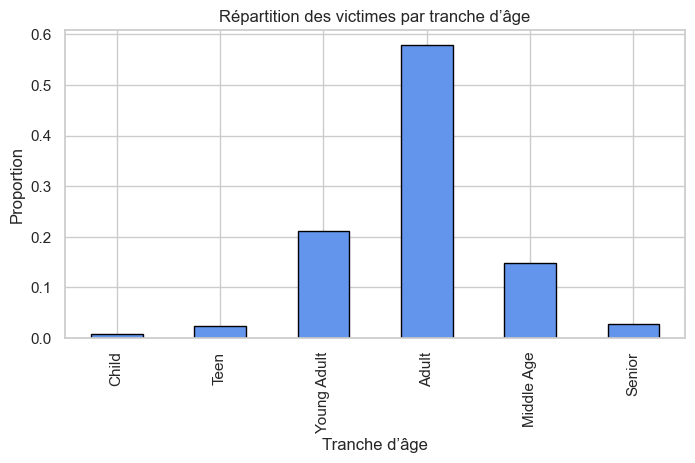

In [23]:
# --- Visualisation de la répartition par groupe d'âge ---
plt.figure(figsize=(8,4))
df["Vict Age Group"].value_counts(normalize=True).sort_index().plot(
    kind="bar", color="cornflowerblue", edgecolor="black"
)
plt.title("Répartition des victimes par tranche d’âge")
plt.ylabel("Proportion")
plt.xlabel("Tranche d’âge")
plt.show()

In [24]:
# --- Vérification finale du type ---
print("\n Type de la variable après traitement :", df["Vict Age"].dtype)


 Type de la variable après traitement : Int64


# ============================================================
# TRAITEMENT DES VARIABLES Lieu (Premis : MCAR)
# ============================================================

In [25]:
#TRAITEMENT DES VARIABLES Lieu (Premis : MCAR/MAR)
#CETTE VARIABLE CONTIENT Très peu de manquants (<1%). Ici, ça ressemble à de la simple erreur de saisie.
#Ainsi, l'Action choisie sera de remplir par "NO DESC" Parce que le volume de manquants est insignifiant, pas besoin de méthode complexe

# Nettoyage Premis Desc : NA -> "NO DESC"
if "Premis Desc" in df.columns:
    df["Premis Desc"] = df["Premis Desc"].replace("-", np.nan)
    df["Premis Desc"] = df["Premis Desc"].fillna("NO DESC")

# Nettoyage Premis Cd : NA -> -1 (valeur speciale)
if "Premis Cd" in df.columns:
    df["Premis Cd"] = df["Premis Cd"].fillna(-1).astype(int)


# ============================================================
# TRAITEMENT DE LA VARIABLE Crm Cd 1 (MCAR)
# ============================================================

In [26]:
#TRAITEMENT DE LA VARIABLE Crm Cd 1 (MCAR)
#Très rares NA (11 cas sur ~1M). Cela ressemble à une saisie oubliée. d'ou l'Action choisie : imputer par valeur la plus fréquente (mode).
#Car cela ne changera pas la distribution globale
# Très rares NA → remplacer par mode

if "Crm Cd 1" in df.columns:
    mode_value = df["Crm Cd 1"].mode()[0]  # Calcule le mode
    df["Crm Cd 1"] = df["Crm Cd 1"].fillna(mode_value).astype(int)



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   DR_NO                982638 non-null  int64   
 1   Date Rptd            982638 non-null  object  
 2   DATE OCC             982638 non-null  object  
 3   TIME OCC             982638 non-null  int64   
 4   AREA                 982638 non-null  int64   
 5   AREA NAME            982638 non-null  object  
 6   Rpt Dist No          982638 non-null  int64   
 7   Part 1-2             982638 non-null  int64   
 8   Crm Cd               982638 non-null  int64   
 9   Crm Cd Desc          982638 non-null  object  
 10  Mocodes              982638 non-null  object  
 11  Vict Age             982638 non-null  Int64   
 12  Vict Sex             982638 non-null  object  
 13  Vict Descent         982638 non-null  object  
 14  Premis Cd            982638 non-null  int64   
 15  

# ============================================================
# TRAITEMENT DE LA VARIABLE AREA NAME (erreur de typage)
# ============================================================

In [28]:
print("Type de la colonne :", df["AREA NAME"].dtype)
print("\nExemples de valeurs uniques :")
print(df["AREA NAME"].unique())


Type de la colonne : object

Exemples de valeurs uniques :
['Wilshire' 'Central' 'Southwest' 'Van Nuys' 'Hollywood' 'Southeast'
 'Newton' 'Mission' 'Rampart' 'West Valley' 'West LA' 'Olympic'
 'Hollenbeck' 'Topanga' 'Northeast' '77th Street' 'Pacific' 'N Hollywood'
 'Harbor' 'Foothill' 'Devonshire']


In [29]:
df["AREA NAME"] = (
    df["AREA NAME"]
    .astype(str)
    .str.strip()       # Supprime espaces
    .str.upper()       # Tout en majuscules
    .str.replace(r"[^A-Z0-9\s]", "", regex=True)  # Enlève ponctuation ou caractères spéciaux
)


In [30]:
print("Valeurs uniques après nettoyage :", df["AREA NAME"].nunique())
print("\nExemples :", sorted(df["AREA NAME"].unique()))


Valeurs uniques après nettoyage : 21

Exemples : ['77TH STREET', 'CENTRAL', 'DEVONSHIRE', 'FOOTHILL', 'HARBOR', 'HOLLENBECK', 'HOLLYWOOD', 'MISSION', 'N HOLLYWOOD', 'NEWTON', 'NORTHEAST', 'OLYMPIC', 'PACIFIC', 'RAMPART', 'SOUTHEAST', 'SOUTHWEST', 'TOPANGA', 'VAN NUYS', 'WEST LA', 'WEST VALLEY', 'WILSHIRE']


# ============================================================
# TRAITEMENT DE LA VARIABLE Status (MCAR)
# ============================================================

In [31]:
#TRAITEMENT DE LA VARIABLE Status (MCAR)
#Avec seulement 1 enregistrement manquant → typique d’un oubli isolé. l'Action choisie : remplacer par la valeur la plus fréquente.
#Pas d’impact sur l’analyse globale.
if "Status" in df.columns:
    mode_status = df["Status"].mode()[0]
    df["Status"] = df["Status"].fillna(mode_status)



In [32]:
print("Shape final:", df.shape)

# Vérifier si des NA restent
na_check = df.isna().sum().sort_values(ascending=False)
print(" Valeurs manquantes restantes :\n", na_check.head(50))


Shape final: (982638, 35)
 Valeurs manquantes restantes :
 DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes                0
Vict Age               0
Vict Sex               0
Vict Descent           0
Premis Cd              0
Premis Desc            0
Weapon Used Cd         0
Weapon Desc            0
Status                 0
Status Desc            0
Crm Cd 1               0
Crm Cd 2               0
Crm Cd 3               0
Crm Cd 4               0
LOCATION               0
Cross Street           0
LAT                    0
LON                    0
multi_crime_flag       0
cross_missing_flag     0
weapon_missing_flag    0
Weapon Used Flag       0
mocode_missing_flag    0
Mocodes_list           0
Vict Age Group         0
dtype: int64


# ============================================================
# TRAITEMENT DES VARIABLES TEMPORELLES (DATES / HEURES)
# ============================================================

In [33]:
#TRANSFORMATION DES VARIABLES DATE ET HEURES ET CREATION DES VARIABLES DERIVEES TEMPORELLES

# ---  Transformation des dates et heures ---

# Conversion des deux colonnes de dates avec le bon format
date_format = "%m/%d/%Y %I:%M:%S %p"

df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], format=date_format, errors="coerce")
df["Date Rptd"] = pd.to_datetime(df["Date Rptd"], format=date_format, errors="coerce")

# Vérifier que la conversion a bien fonctionné
print("Vérification de la conversion :")
print(df[["DATE OCC", "Date Rptd"]].head())

# Calcul du délai entre la survenue et le signalement (en jours)
df["Reporting Delay (days)"] = (df["Date Rptd"] - df["DATE OCC"]).dt.days

# Correction des anomalies : valeurs négatives = incohérences
# Si Date Rptd < DATE OCC → c’est une anomalie (erreur de saisie).
#On peut donc corriger ces cas en mettant le délai à NaN
df.loc[df["Reporting Delay (days)"] < 0, "Reporting Delay (days)"] = np.nan

# Catégoriser le délai de signalement en créant des tranches de délai (utile pour la modélisation)
def categorize_delay(days):
    if pd.isna(days):
        return "Unknown"
    elif days == 0:
        return "Same day"
    elif days <= 2:
        return "Short delay"
    elif days <= 7:
        return "Moderate delay"
    else:
        return "Long delay"

df["Reporting Delay Category"] = df["Reporting Delay (days)"].apply(categorize_delay)

# 🔍 Vérifications finales
print("\nRésumé statistique du délai :")
print(df["Reporting Delay (days)"].describe())

print("\nRépartition des catégories :")
print(df["Reporting Delay Category"].value_counts(dropna=False))

# Aperçu final
df[["DATE OCC", "Date Rptd", "Reporting Delay (days)", "Reporting Delay Category"]].head(10)


Vérification de la conversion :
    DATE OCC  Date Rptd
0 2020-03-01 2020-03-01
1 2020-02-08 2020-02-09
2 2020-11-04 2020-11-11
3 2020-03-10 2023-05-10
4 2020-08-17 2022-08-18

Résumé statistique du délai :
count    982638.000000
mean         11.859456
std          66.837192
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max        1711.000000
Name: Reporting Delay (days), dtype: float64

Répartition des catégories :
Reporting Delay Category
Same day          475712
Short delay       278436
Long delay        127915
Moderate delay    100575
Name: count, dtype: int64


,DATE OCC,Date Rptd,Reporting Delay (days),Reporting Delay Category
0,2020-03-01,2020-03-01,0.0,Same day
1,2020-02-08,2020-02-09,1.0,Short delay
2,2020-11-04,2020-11-11,7.0,Moderate delay
3,2020-03-10,2023-05-10,1156.0,Long delay
4,2020-08-17,2022-08-18,731.0,Long delay
5,2020-12-01,2023-04-04,854.0,Long delay
6,2020-07-03,2023-04-04,1005.0,Long delay
7,2020-05-12,2022-07-22,801.0,Long delay
8,2020-12-09,2023-04-28,870.0,Long delay
9,2020-12-31,2020-12-31,0.0,Same day


In [34]:
#Creation des variables derivees pour la variable Date OCC (Date reelle de survenue de l'incident

# Extraire le jour de la semaine et le mois
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
df['Month'] = df['DATE OCC'].dt.month

# Extraire l'heure à partir de TIME OCC (format HHMM)
df['Hour'] = (df['TIME OCC'] // 100).astype(int)

# Créer des tranches horaires (TimeOfDay)
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)

# Grouper les mois en saisons (pour la ville de Los Angeles)
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return np.nan

df['Season'] = df['Month'].apply(month_to_season)

# Identifier les jours de semaine et weekend
df['WeekType'] = df['DayOfWeek'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

#grouper en periodes
# Extraire l'année
df['Year'] = df['DATE OCC'].dt.year

# Créer la variable 'Period' au format "YYYY-MM"
df['Period'] = df['DATE OCC'].dt.to_period('M').astype(str)

# Vérification finale
print("Variables dérivées temporelles créées : DayOfWeek, Month, Hour, TimeOfDay, Season, WeekType")
df[['DATE OCC', 'DayOfWeek', 'Month', 'Season', 'Hour', 'TimeOfDay', 'WeekType', 'Year', 'Period']].head()

Variables dérivées temporelles créées : DayOfWeek, Month, Hour, TimeOfDay, Season, WeekType


,DATE OCC,DayOfWeek,Month,Season,Hour,TimeOfDay,WeekType,Year,Period
0,2020-03-01,Sunday,3,Spring,21,Evening,Weekend,2020,2020-03
1,2020-02-08,Saturday,2,Winter,18,Evening,Weekend,2020,2020-02
2,2020-11-04,Wednesday,11,Autumn,17,Afternoon,Weekday,2020,2020-11
3,2020-03-10,Tuesday,3,Spring,20,Evening,Weekday,2020,2020-03
4,2020-08-17,Monday,8,Summer,12,Afternoon,Weekday,2020,2020-08


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DR_NO                     982638 non-null  int64         
 1   Date Rptd                 982638 non-null  datetime64[ns]
 2   DATE OCC                  982638 non-null  datetime64[ns]
 3   TIME OCC                  982638 non-null  int64         
 4   AREA                      982638 non-null  int64         
 5   AREA NAME                 982638 non-null  object        
 6   Rpt Dist No               982638 non-null  int64         
 7   Part 1-2                  982638 non-null  int64         
 8   Crm Cd                    982638 non-null  int64         
 9   Crm Cd Desc               982638 non-null  object        
 10  Mocodes                   982638 non-null  object        
 11  Vict Age                  982638 non-null  Int64         
 12  Vi

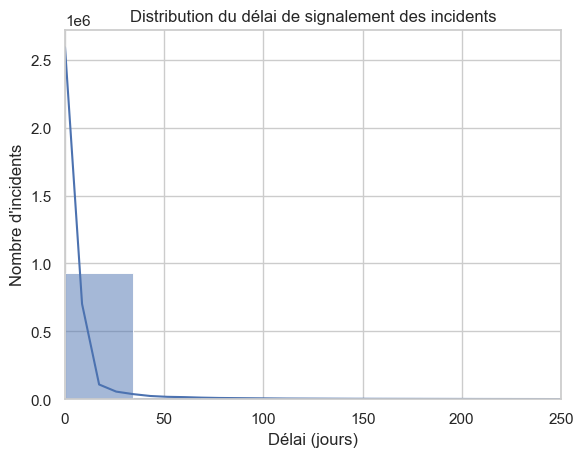

In [36]:
#Visualisation de la transformation

sns.histplot(df["Reporting Delay (days)"], bins=50, kde=True)
plt.title("Distribution du délai de signalement des incidents")
plt.xlabel("Délai (jours)")
plt.ylabel("Nombre d'incidents")
plt.xlim(0, 250)
plt.show()


# ============================================================
# TRAITEMENT DES COORDONNÉES GÉOGRAPHIQUES (LAT / LON)
# ============================================================

In [37]:
df["LON"].describe()

count    982638.000000
mean       -118.082225
std           5.672940
min        -118.667600
25%        -118.430500
50%        -118.322500
75%        -118.273900
max           0.000000
Name: LON, dtype: float64

In [38]:
df["LAT"].describe()

count    982638.000000
mean         33.995725
std           1.636729
min           0.000000
25%          34.014600
50%          34.058900
75%          34.164900
max          34.334300
Name: LAT, dtype: float64

In [39]:
# ============================================================
# IMPUTATION DES COORDONNÉES GÉOGRAPHIQUES (LAT / LON)
# ============================================================

import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import time

# ============================================================
# 1️⃣ Nettoyage initial des coordonnées
# ============================================================
print("Étape 1 : Nettoyage des coordonnées (remplacement des 0,0 par NaN)")
df.loc[(df["LAT"] == 0) | (df["LON"] == 0), ["LAT", "LON"]] = np.nan
print(df[["LAT", "LON"]].isna().sum())



Étape 1 : Nettoyage des coordonnées (remplacement des 0,0 par NaN)
LAT    2262
LON    2262
dtype: int64


In [40]:
# ============================================================
# 2️⃣ Géocodage d’un échantillon (500 lignes)
# ============================================================
print("\nÉtape 2 : Géocodage d’un échantillon de 500 lignes manquantes avec Geopy")

geolocator = Nominatim(user_agent="crime_analysis")

def geocode_address(row):
    """Géocode une adresse textuelle via Nominatim"""
    if pd.isna(row["LAT"]) and pd.notna(row["LOCATION"]):
        try:
            address = str(row["LOCATION"]) + ", Los Angeles, CA"
            location = geolocator.geocode(address)
            if location:
                return pd.Series({"LAT": location.latitude, "LON": location.longitude})
        except:
            pass
    return pd.Series({"LAT": np.nan, "LON": np.nan})

# Prélèvement aléatoire de 500 lignes à géocoder
sample = df[df["LAT"].isna()].sample(500, random_state=42)

# Application du géocodage
sample_coords = sample.apply(geocode_address, axis=1)
df.loc[sample.index, ["LAT", "LON"]] = sample_coords

print("Nombre d'adresses géocodées avec succès :", df.loc[sample.index, "LAT"].notna().sum())
print("Nombre d'échecs de géocodage :", df.loc[sample.index, "LAT"].isna().sum())




Étape 2 : Géocodage d’un échantillon de 500 lignes manquantes avec Geopy
Nombre d'adresses géocodées avec succès : 381
Nombre d'échecs de géocodage : 119


In [41]:
# ============================================================
# 3️⃣ Imputation automatique par adresse (LOCATION)
# ============================================================
print("\nÉtape 3 : Imputation automatique des autres valeurs via LOCATION")

# Construire une base unique de coordonnées connues par LOCATION
known_locations = (
    df.dropna(subset=["LAT", "LON"])
      .groupby("LOCATION")[["LAT", "LON"]]
      .median()      # ou .first() selon préférence
      .reset_index()
)

print("Nombre d'adresses uniques connues :", known_locations.shape[0])

# Vérification des doublons avant merge
dups = known_locations["LOCATION"].duplicated().sum()
print("Doublons dans known_locations :", dups)

# Fusion propre sans duplication
df = df.merge(known_locations, on="LOCATION", how="left", suffixes=("", "_ref"))

# Remplissage des valeurs manquantes
df["LAT"] = df["LAT"].fillna(df["LAT_ref"])
df["LON"] = df["LON"].fillna(df["LON_ref"])
df.drop(columns=["LAT_ref", "LON_ref"], inplace=True)

print("Valeurs manquantes restantes après imputation par adresse :")
print(df[["LAT", "LON"]].isna().sum())

# Vérification que le nombre de lignes n’a pas changé
print("\nVérification du nombre de lignes :", df.shape)




Étape 3 : Imputation automatique des autres valeurs via LOCATION
Nombre d'adresses uniques connues : 66240
Doublons dans known_locations : 0
Valeurs manquantes restantes après imputation par adresse :
LAT    26
LON    26
dtype: int64

Vérification du nombre de lignes : (982638, 45)


In [42]:
# ============================================================
# 4️⃣ Imputation finale par zone (AREA NAME)
# ============================================================
print("\nÉtape 4 : Imputation finale par médiane de la zone")

df["LAT"] = df.groupby("AREA NAME")["LAT"].transform(lambda x: x.fillna(x.median()))
df["LON"] = df.groupby("AREA NAME")["LON"].transform(lambda x: x.fillna(x.median()))

print("Valeurs manquantes restantes après imputation par zone :")
print(df[["LAT", "LON"]].isna().sum())

print("\n✅ Imputation géographique terminée avec succès !")
print("Taille finale du DataFrame :", df.shape)



Étape 4 : Imputation finale par médiane de la zone
Valeurs manquantes restantes après imputation par zone :
LAT    0
LON    0
dtype: int64

✅ Imputation géographique terminée avec succès !
Taille finale du DataFrame : (982638, 45)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DR_NO                     982638 non-null  int64         
 1   Date Rptd                 982638 non-null  datetime64[ns]
 2   DATE OCC                  982638 non-null  datetime64[ns]
 3   TIME OCC                  982638 non-null  int64         
 4   AREA                      982638 non-null  int64         
 5   AREA NAME                 982638 non-null  object        
 6   Rpt Dist No               982638 non-null  int64         
 7   Part 1-2                  982638 non-null  int64         
 8   Crm Cd                    982638 non-null  int64         
 9   Crm Cd Desc               982638 non-null  object        
 10  Mocodes                   982638 non-null  object        
 11  Vict Age                  982638 non-null  Int64         
 12  Vi

In [60]:
#Enregistrement du fichier nettoyer au format CSV
#dans le but garder une copie propre et utilisable pour les visualisations
# Chemin de sauvegarde (à adapter à mon PC)
file_path = r"C:\Users\Leila Kouougue\OneDrive - Collège la Cité (1)\ETAPE 3\PROJET ANALYSE DES DONNÉES\LA_Crime_Cleaned.csv"

# Sauvegarder
df.to_csv(file_path, index=False)

print(f"Dataset nettoyé enregistré ici : {file_path}")


Dataset nettoyé enregistré ici : C:\Users\Leila Kouougue\OneDrive - Collège la Cité (1)\ETAPE 3\PROJET ANALYSE DES DONNÉES\LA_Crime_Cleaned1.csv


In [45]:
nb_total = len(df)
nb_uniques = df['DR_NO'].nunique()
print(f"Nombre total de lignes : {nb_total}")
print(f"Nombre unique de DR_NO : {nb_uniques}")


Nombre total de lignes : 982638
Nombre unique de DR_NO : 982638


In [46]:
print("Shape:", df.shape)
df.info()

nb_total = len(df)
nb_uniques = df['DR_NO'].nunique()
print(f"Nombre total de lignes : {nb_total}")
print(f"Nombre unique de DR_NO : {nb_uniques}")



Shape: (982638, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DR_NO                     982638 non-null  int64         
 1   Date Rptd                 982638 non-null  datetime64[ns]
 2   DATE OCC                  982638 non-null  datetime64[ns]
 3   TIME OCC                  982638 non-null  int64         
 4   AREA                      982638 non-null  int64         
 5   AREA NAME                 982638 non-null  object        
 6   Rpt Dist No               982638 non-null  int64         
 7   Part 1-2                  982638 non-null  int64         
 8   Crm Cd                    982638 non-null  int64         
 9   Crm Cd Desc               982638 non-null  object        
 10  Mocodes                   982638 non-null  object        
 11  Vict Age                  982638 non-null  In

In [47]:
print("Nombre total de lignes :", len(df))
print("Nombre unique de DR_NO :", df["DR_NO"].nunique())


Nombre total de lignes : 982638
Nombre unique de DR_NO : 982638


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   DR_NO                     982638 non-null  int64         
 1   Date Rptd                 982638 non-null  datetime64[ns]
 2   DATE OCC                  982638 non-null  datetime64[ns]
 3   TIME OCC                  982638 non-null  int64         
 4   AREA                      982638 non-null  int64         
 5   AREA NAME                 982638 non-null  object        
 6   Rpt Dist No               982638 non-null  int64         
 7   Part 1-2                  982638 non-null  int64         
 8   Crm Cd                    982638 non-null  int64         
 9   Crm Cd Desc               982638 non-null  object        
 10  Mocodes                   982638 non-null  object        
 11  Vict Age                  982638 non-null  Int64         
 12  Vi

In [49]:
 nb_total = len(df)
nb_uniques = df['DR_NO'].nunique()
print(f"Nombre total de lignes : {nb_total}")
print(f"Nombre unique de DR_NO : {nb_uniques}")


Nombre total de lignes : 982638
Nombre unique de DR_NO : 982638
